## Analytics for Unstructured Data
### Group Project : Amber Heard Image Consulting
#### Group Members : Jyotis Joy (jj37257), Eeshana Hamed (eh28497), Anukul Kumar Singh (as229663), Vi Trieu Tran (vtt332), Aneerudh Ravishankar (ar75925)


### Procuring comments on Youtube video using Youtube API

In [ ]:
import googleapiclient.discovery
import pandas as pd
def get_video_comments(api_key, video_id):
    youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)
    # Fetch comments
    comments = []
    request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        textFormat='plainText'
    )
    while request:
        response = request.execute()
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
        request = youtube.commentThreads().list_next(request, response)
    return comments
if __name__ == "__main__":
    # Replace with your API key
    api_key =
    # List of video IDs
    video_ids = ['9EuLwJFVqgY', 'rBuyOsrTm5A', 'JJ6YlOhNuAo', '15vGwB3oVsU', 'uorN-D01Viw']
    # List to store all comments
    all_comments = []
    # Fetch comments for each video and concatenate them
    for video_id in video_ids:
        comments = get_video_comments(api_key, video_id)
        all_comments.extend(comments)
    # Create a DataFrame with a single column for comments
    df_comments = pd.DataFrame({'Comments': all_comments})
    # Print the DataFrame
    print(df_comments)
    # Save the DataFrame to a CSV file
    df_comments.to_csv('youtube_comments_combined.csv', index=False)

###  Data Precrocessing:  Word frequencies and Zipf's Law Compliance

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('youtube_comments_combined.csv')

# Check and clean the 'Comments' column
df['Comments'] = df['Comments'].fillna('')  # Fill NaN values with an empty string
df['Comments'] = df['Comments'].astype(str)  # Ensure all values are strings

# Tokenize the text and keep only alphanumeric words
words = [word.lower() for comment in df['Comments'] for word in word_tokenize(comment) if word.isalnum()]

# Calculate word frequencies using a Counter
word_freq = Counter(words)

# Rank the words by frequency, producing a list of tuples (word, frequency)
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the most common 200 words in the data including stopwords
most_common_200 = sorted_words[:200]

# Extract ranks and frequencies from the most common 100 words
ranks = range(1, len(most_common_100) + 1)
frequencies = [item[1] for item in most_common_100]

most_common_200

[('she', 23234),
 ('the', 20038),
 ('to', 15739),
 ('and', 14148),
 ('her', 14102),
 ('a', 14046),
 ('is', 13328),
 ('i', 12680),
 ('of', 9163),
 ('that', 7884),
 ('it', 7604),
 ('this', 7039),
 ('in', 6717),
 ('you', 5858),
 ('was', 5176),
 ('so', 5081),
 ('he', 5067),
 ('for', 4678),
 ('not', 4534),
 ('on', 4454),
 ('johnny', 4250),
 ('like', 4200),
 ('s', 4101),
 ('with', 4028),
 ('but', 3557),
 ('all', 3493),
 ('amber', 3420),
 ('what', 3320),
 ('at', 3315),
 ('just', 2991),
 ('how', 2986),
 ('be', 2925),
 ('can', 2900),
 ('him', 2816),
 ('are', 2719),
 ('have', 2717),
 ('if', 2602),
 ('as', 2596),
 ('when', 2594),
 ('they', 2495),
 ('t', 2492),
 ('do', 2371),
 ('his', 2286),
 ('did', 2249),
 ('no', 2216),
 ('about', 2196),
 ('me', 2118),
 ('up', 2080),
 ('would', 2049),
 ('an', 2034),
 ('acting', 2027),
 ('from', 1943),
 ('or', 1904),
 ('has', 1885),
 ('one', 1875),
 ('even', 1710),
 ('there', 1664),
 ('why', 1659),
 ('who', 1616),
 ('my', 1615),
 ('know', 1527),
 ('out', 1516),
 

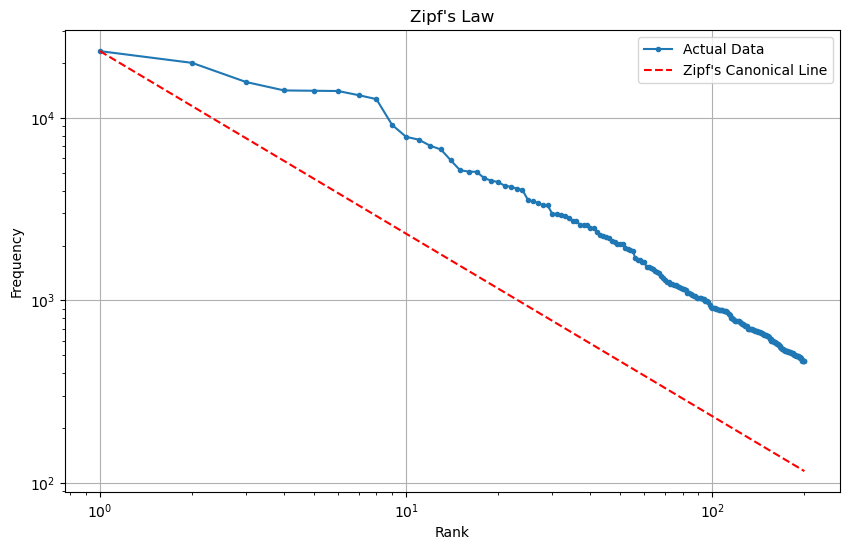

In [ ]:
# Define parameters for the Zipf's canonical line
C = frequencies[0]  # Set C as the frequency of the most common word
k = 1.0  # Adjust k as needed (typically close to 1)

# Generate expected frequencies based on Zipf's canonical line
expected_frequencies = [C / (rank ** k) for rank in ranks]

# Plot the results on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', label='Actual Data')
plt.loglog(ranks, expected_frequencies, linestyle='--', color='red', label="Zipf's Canonical Line")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
import string
import nltk

# Download the NLTK stopwords dataset if you haven't already
nltk.download('stopwords')

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('youtube_comments_combined.csv')

# Define a function to preprocess the text and extract relevant words
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()
        text = ''.join([char for char in text if char not in string.punctuation])
        tokens = text.split()
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []  # Return an empty list for non-string values (e.g., NaN)

# Apply the preprocessing function to your review column and create a list of all words
all_words = []
for comment in df['Comments']:
    words = preprocess_text(comment)
    all_words.extend(words)

# Calculate word frequencies using Counter
word_freq = Counter(all_words)

# Convert word frequency analysis results to a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Attribute', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Print the top 100 attributes
top_100_attributes = word_freq_df.head(100)
top_100_attributes.to_csv("top_100.csv")
top_100_attributes


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vitra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Attribute  Frequency
157       like       4178
152     johnny       3804
50       amber       3144
122       shes       2637
83      acting       1992
...        ...        ...
1090     every        520
134        hit        518
41       trial        518
233      drugs        515
40       whole        514

[100 rows x 2 columns]

In [ ]:
selected_attributes = []
for i in range(3):
    attribute = input(f"Select attribute {i + 1} from the above list: ")
    selected_attributes.append(attribute)

Select attribute 1 from the above list: both
Select attribute 2 from the above list: lie
Select attribute 3 from the above list: fake


In [ ]:

# Create a DataFrame with the selected attributes
selected_attributes_df = pd.DataFrame({'Attribute': selected_attributes})

# Save the selected attributes to 'attributes.csv'
selected_attributes_df.to_csv('attributes.csv', index=False)
print("Selected attributes saved to 'attributes.csv'.")


Selected attributes saved to 'attributes.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the 'Youtube_comments.csv' and 'attributes.csv' files into pandas DataFrames
comments_df = pd.read_csv('youtube_comments_combined.csv')
attributes_df = pd.read_csv('attributes.csv')

# Create a list of attributes from 'attributes.csv'
attributes = attributes_df['Attribute'].tolist()

# Create a function to calculate cosine similarity between attributes and reviews
def calculate_similarity(attribute, comment, vectorizer):
    if pd.isna(comment):  # Handle missing (NaN) values
        return 0.0  # You can choose another value if necessary
    comment = comment.lower()  # Convert comment to lowercase
    attribute = attribute.lower()  # Convert attribute to lowercase
    attribute_vector = vectorizer.transform([attribute])
    comment_vector = vectorizer.transform([comment])
    return cosine_similarity(attribute_vector, comment_vector)[0][0]

# Initialize the CountVectorizer with the attributes and fit it
vectorizer = CountVectorizer(binary=True, stop_words='english', lowercase=True)
vectorizer.fit(attributes)

# Initialize a list to store the results as dictionaries
results = []

# Iterate through each product in the csv
for index, row in comments_df.iterrows():
    comment = row['Comments']

    # Calculate similarity for each attribute and review
    for attribute in attributes:
        similarity_score = calculate_similarity(attribute, comment, vectorizer)
        results.append({'comment': comment, 'similarity_score': similarity_score})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the results DataFrame by similarity score in descending order
results_df.sort_values(by='similarity_score', ascending=False, inplace=True)


In [ ]:
results_df

comment  similarity_score
59579  When you’re a kid you probably fake crying to ...               1.0
70079                               08:54 her fake laugh               1.0
49643  This is so clearly fake and exaggerated it's h...               1.0
45017                        Fake victim and fake actor!               1.0
65774  There’s so many details she adds to her storie...               1.0
...                                                  ...               ...
25092  Ridiculous amount of commercials on this chann...               0.0
25091  1.  What is a parakeet floor?  Does she mean P...               0.0
25090  1.  What is a parakeet floor?  Does she mean P...               0.0
25089  1.  What is a parakeet floor?  Does she mean P...               0.0
74528                                              woah!               0.0

[74529 rows x 2 columns]

### Sentiment Analysis using VADER

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
# Load the YouTube comments data into a DataFrame
# Replace 'Youtube_comments_combined.csv' with the actual file path
df = pd.read_csv('Youtube_comments_combined.csv')
# Drop rows with missing comments
df.dropna(subset=['Comments'], inplace=True)



In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_score(comment):
    sentiment = analyzer.polarity_scores(comment)
    return sentiment['compound']  # Compound score represents overall sentiment

# Apply sentiment analysis to the 'Comments' column and create a new column 'Sentiment'
df['Sentiment'] = df['Comments'].apply(get_sentiment_score)

In [ ]:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)



In [ ]:
from textblob import TextBlob

# Define a function to get sentiment scores
def get_sentiment_score(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity  # Polarity represents sentiment

# Apply sentiment analysis to the 'Comments' column and create a new column 'Sentiment'
df['Sentiment'] = df['Comments'].apply(get_sentiment_score)


In [ ]:
sentiment_summary = df['SentimentCategory'].value_counts()
print(sentiment_summary)

SentimentCategory
negative    10781
positive     9030
neutral      5031
Name: count, dtype: int64


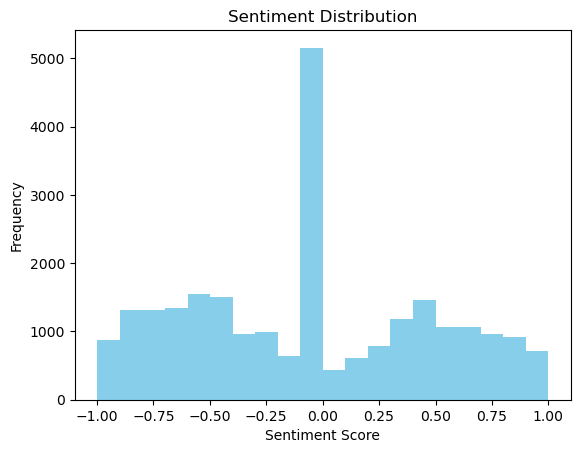

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of sentiment scores
plt.hist(df['Sentiment'], bins=20, color='skyblue')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


In [ ]:
# Export the DataFrame to a CSV file with sentiment analysis results
df.to_csv('sentiment_analysis_results.csv', index=False)


In [ ]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk  # Import the nltk library
nltk.download('vader_lexicon')  # Download the VADER lexicon

# Rest of your code...
df = pd.read_csv('sentiment_analysis_results.csv')
analyzer = SentimentIntensityAnalyzer()

positive_words = Counter()
negative_words = Counter()
neutral_words = Counter()

def update_word_frequencies(comment, sentiment, pos_words, neg_words, neu_words):
    words = word_tokenize(comment.lower())
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

    if sentiment == 'positive':
        pos_words.update(words)
    elif sentiment == 'negative':
        neg_words.update(words)
    elif sentiment == 'neutral':
        neu_words.update(words)

for index, row in df.iterrows():
    comment = row['Comments']
    sentiment = row['SentimentCategory']
    update_word_frequencies(comment, sentiment, positive_words, negative_words, neutral_words)

df_positive = pd.DataFrame.from_dict(positive_words, orient='index', columns=['Frequency'])
df_negative = pd.DataFrame.from_dict(negative_words, orient='index', columns=['Frequency'])
df_neutral = pd.DataFrame.from_dict(neutral_words, orient='index', columns=['Frequency'])

df_positive = df_positive.sort_values(by='Frequency', ascending=False)
df_negative = df_negative.sort_values(by='Frequency', ascending=False)
df_neutral = df_neutral.sort_values(by='Frequency', ascending=False)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vitra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
print("Top 50 words in Positive Sentiment:")
print(df_positive.head(50))

Top 50 words in Positive Sentiment:
           Frequency
like            2637
johnny          1974
amber           1394
would            821
love             722
one              710
acting           684
know             641
get              607
even             602
really           591
see              556
depp             555
lol              551
people           545
good             538
think            532
way              520
jury             500
time             495
heard            489
look             489
said             472
trying           471
much             435
story            431
never            430
make             425
jd               405
believe          405
hope             398
could            370
feel             365
woman            363
face             354
life             353
say              350
actress          327
someone          326
looks            326
wow              325
well             324
truth            319
person           318
man              31

In [ ]:
print("\nTop 50 words in Negative Sentiment:")
print(df_negative.head(50))



Top 50 words in Negative Sentiment:
           Frequency
johnny          1818
amber           1533
like            1462
bad             1174
acting          1126
would           1094
fake            1053
one             1001
even             938
lies             835
really           795
lying            743
see              739
people           716
know             687
get              683
liar             647
actress          626
believe          626
woman            612
look             606
never            604
tears            597
way              589
heard            585
think            581
time             561
face             554
trying           552
much             507
crying           506
depp             499
said             492
make             489
jury             486
person           483
story            477
feel             457
hard             457
could            432
jd               423
ca               423
watch            419
testimony        417
say              4

In [ ]:
print("\nTop 50 words in Neutral Sentiment:")
print(df_neutral.head(50))



Top 50 words in Neutral Sentiment:
           Frequency
amber            493
johnny           458
acting           217
know             199
heard            193
believe          183
even             170
look             165
one              164
get              162
time             144
would            134
ca               133
said             131
face             130
see              125
think            123
say              119
jury             118
really           115
story            110
anyone           109
depp             109
never            106
remember         101
like             101
says             101
stand             98
someone           96
people            94
much              94
going             90
go                90
watch             87
many              86
jd                84
hit               83
make              82
woman             81
lawyer            81
testimony         81
looking           80
could             79
actress           78
wait              7

In [ ]:
# Define the base word (e.g., 'Amber')
base_word = 'amber'

# Get the top 50 words from each DataFrame
top_positive_words = df_positive.index[:50]
top_negative_words = df_negative.index[:50]
top_neutral_words = df_neutral.index[:50]

# Calculate lift values for the top 50 words in each category based on 'Amber' as the base, excluding 'Amber' itself
def calculate_lift(word, category_words, base_word, total_words):
    if word == base_word:
        return 1.0  # Lift with itself is always 1
    word_count = category_words[word]
    word_frequency = df_positive.at[word, 'Frequency']
    base_word_frequency = df_positive.at[base_word, 'Frequency']
    return (total_words * word_count) / (word_frequency * base_word_frequency)

top_positive_lifts = {word: calculate_lift(word, positive_words, base_word, len(df)) for word in top_positive_words}
top_negative_lifts = {word: calculate_lift(word, negative_words, base_word, len(df)) for word in top_negative_words}
top_neutral_lifts = {word: calculate_lift(word, neutral_words, base_word, len(df)) for word in top_neutral_words}

# Print the top 50 words and their lifts for each category based on 'Amber' (excluding 'Amber' itself)
print("Top 50 Positive Word Lifts based on 'Amber':")
for word, lift in top_positive_lifts.items():
    print(f"{word}: {lift:.2f}")

print("\nTop 50 Negative Word Lifts based on 'Amber':")
for word, lift in top_negative_lifts.items():
    print(f"{word}: {lift:.2f}")

print("\nTop 50 Neutral Word Lifts based on 'Amber':")
for word, lift in top_neutral_lifts.items():
    print(f"{word}: {lift:.2f}")

Top 50 Positive Word Lifts based on 'Amber':
like: 17.82
johnny: 17.82
amber: 1.00
would: 17.82
love: 17.82
one: 17.82
acting: 17.82
know: 17.82
get: 17.82
even: 17.82
really: 17.82
see: 17.82
depp: 17.82
lol: 17.82
people: 17.82
good: 17.82
think: 17.82
way: 17.82
jury: 17.82
time: 17.82
heard: 17.82
look: 17.82
said: 17.82
trying: 17.82
much: 17.82
story: 17.82
never: 17.82
make: 17.82
believe: 17.82
jd: 17.82
hope: 17.82
could: 17.82
feel: 17.82
woman: 17.82
face: 17.82
life: 17.82
say: 17.82
actress: 17.82
someone: 17.82
looks: 17.82
wow: 17.82
well: 17.82
truth: 17.82
person: 17.82
man: 17.82
testimony: 17.82
also: 17.82
movie: 17.82
got: 17.82
telling: 17.82

Top 50 Negative Word Lifts based on 'Amber':
johnny: 16.41
amber: 1.00
like: 9.88
bad: 91.76
acting: 29.34
would: 23.75
fake: 89.79
one: 25.12
even: 27.77
lies: 86.01
really: 23.97
lying: 92.59
see: 23.69
people: 23.41
know: 19.10
get: 20.05
liar: 138.92
actress: 34.12
believe: 27.55
woman: 30.09
look: 22.08
never: 25.03
tea

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('sentiment_analysis_results.csv')

# Define a list of keywords and bigrams
keywords = ['take sides', 'neither', 'either', 'sidelines', 'neutral', 'winner', 'both', 'move on']

# Create a regular expression pattern to match any of the keywords
pattern = '|'.join(keywords)

# Filter comments containing the specified keywords
comments_with_keywords = df[df['Comments'].str.contains(pattern, case=False, na=False, regex=True)]

# Display the filtered comments
for comment in comments_with_keywords['Comments']:
    print(comment)

They’re both toxic! It’s called trauma bonding ! He’s no saint
I think these two were both toxic. I think Amber brought out the worst in Johnny and neither deserved this relationship. Im glad theyve both moved on and thr truth has come out
I wonder... does anybody feel like maybe its some , even liiiitle... truth in her story? I mean.... in relationships or any  human interaction is always 50/50 .... makes me wonder.... I am trying hard to be objective in this however she makes it hard to be on her side.......does anybody feel like maybe this whole trial thing is also  an act..for both of them?...dunno...
I believe he was sensitive about her having a previous female partner. I believe he allowed that sensitivity to cause constant accusations against her. I think she's telling the truth a lot of the time when it comes to that. She was probably in a position of feeling inaccurately accused a lot of the time. However, her gestures and behaviors around a lot of the content seem overly dram

### Identify Trigrams and Quadgrams

In [ ]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')  # Download the Punkt tokenizer

# Load your sentiment data into a DataFrame
df = pd.read_csv('sentiment_analysis_results.csv')

# Create empty counters for trigram frequencies in each sentiment category
trigram_counter_positive = Counter()
trigram_counter_negative = Counter()
trigram_counter_neutral = Counter()

# Define a function to update the trigram frequencies based on sentiment category
def update_trigram_frequencies(comment, sentiment, trigram_counter_pos, trigram_counter_neg, trigram_counter_neu):
    words = word_tokenize(comment.lower())
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    trigrams = list(nltk.ngrams(words, 3, pad_left=True, pad_right=True))

    for trigram in trigrams:
        # Filter out padding and empty trigrams
        if all(word is not None and len(word) > 0 for word in trigram):
            trigram_str = ' '.join(trigram)
            if sentiment == 'positive':
                trigram_counter_pos[trigram_str] += 1
            elif sentiment == 'negative':
                trigram_counter_neg[trigram_str] += 1
            elif sentiment == 'neutral':
                trigram_counter_neu[trigram_str] += 1

# Iterate through the DataFrame and update the trigram frequencies
for index, row in df.iterrows():
    comment = row['Comments']
    sentiment = row['SentimentCategory']
    update_trigram_frequencies(comment, sentiment, trigram_counter_positive, trigram_counter_negative, trigram_counter_neutral)

# Sort the trigram results by frequency in descending order
trigram_counter_positive = Counter(dict(trigram_counter_positive.most_common()))
trigram_counter_negative = Counter(dict(trigram_counter_negative.most_common()))
trigram_counter_neutral = Counter(dict(trigram_counter_neutral.most_common()))

# Print the top 10 trigrams for each sentiment category
print("Top 10 Trigrams in Positive Sentiment:")
print(trigram_counter_positive.most_common(10))

print("\nTop 10 Trigrams in Negative Sentiment:")
print(trigram_counter_negative.most_common(10))

print("\nTop 10 Trigrams in Neutral Sentiment:")
print(trigram_counter_neutral.most_common(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anukul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 Trigrams in Positive Sentiment:
[('talented mr ripley', 22), ('like million dollars', 22), ('feel like watching', 18), ('made feel like', 18), ('feel like million', 18), ('hope jury sees', 17), ('love johnny depp', 17), ('make look like', 16), ('like reading script', 15), ('dog stepped bee', 15)]

Top 10 Trigrams in Negative Sentiment:
[('worst acting ever', 31), ('victim domestic violence', 31), ('blah blah blah', 30), ('bad bad bad', 27), ('lies lies lies', 23), ('fake fake fake', 23), ('really bad actress', 22), ('crying without tears', 20), ('liar liar pants', 20), ('liar pants fire', 20)]

Top 10 Trigrams in Neutral Sentiment:
[('um um um', 29), ('dog stepped bee', 21), ('wait cross examination', 17), ('oscar goes amber', 10), ('goes amber heard', 9), ('laura amber heard', 8), ('anyone else notice', 7), ('every time says', 7), ('ca wait cross', 7), ('slapped across face', 7)]


In [ ]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')  # Download the Punkt tokenizer

# Load your sentiment data into a DataFrame
df = pd.read_csv('sentiment_analysis_results.csv')

# Create empty counters for quadgram frequencies in each sentiment category
quadgram_counter_positive = Counter()
quadgram_counter_negative = Counter()
quadgram_counter_neutral = Counter()

# Define a function to update the quadgram frequencies based on sentiment category
def update_quadgram_frequencies(comment, sentiment, quadgram_counter_pos, quadgram_counter_neg, quadgram_counter_neu):
    words = word_tokenize(comment.lower())
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    quadgrams = list(nltk.ngrams(words, 4, pad_left=True, pad_right=True))

    for quadgram in quadgrams:
        # Filter out padding and empty quadgrams
        if all(word is not None and len(word) > 0 for word in quadgram):
            quadgram_str = ' '.join(quadgram)
            if sentiment == 'positive':
                quadgram_counter_pos[quadgram_str] += 1
            elif sentiment == 'negative':
                quadgram_counter_neg[quadgram_str] += 1
            elif sentiment == 'neutral':
                quadgram_counter_neu[quadgram_str] += 1

# Iterate through the DataFrame and update the quadgram frequencies
for index, row in df.iterrows():
    comment = row['Comments']
    sentiment = row['SentimentCategory']
    update_quadgram_frequencies(comment, sentiment, quadgram_counter_positive, quadgram_counter_negative, quadgram_counter_neutral)

# Sort the quadgram results by frequency in descending order
quadgram_counter_positive = Counter(dict(quadgram_counter_positive.most_common()))
quadgram_counter_negative = Counter(dict(quadgram_counter_negative.most_common()))
quadgram_counter_neutral = Counter(dict(quadgram_counter_neutral.most_common()))

# Print the top 10 quadgrams for each sentiment category
print("Top 10 Quadgrams in Positive Sentiment:")
print(quadgram_counter_positive.most_common(10))

print("\nTop 10 Quadgrams in Negative Sentiment:")
print(quadgram_counter_negative.most_common(10))

print("\nTop 10 Quadgrams in Neutral Sentiment:")
print(quadgram_counter_neutral.most_common(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anukul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 Quadgrams in Positive Sentiment:
[('made feel like million', 16), ('like sun shines glorious', 15), ('sun shines glorious forgets', 15), ('shines glorious forgets cold', 15), ('feel like million dollars', 15), ('attention feel like person', 13), ('feel like person world', 13), ('lot tea like lot', 12), ('like person world everybody', 11), ('person world everybody loves', 11)]

Top 10 Quadgrams in Negative Sentiment:
[('bad bad bad bad', 25), ('liar liar pants fire', 19), ('action cut action cut', 19), ('cut action cut action', 19), ('blah blah blah blah', 14), ('lie lie lie lie', 13), ('worst acting ever seen', 12), ('know ah liar amber', 9), ('ah liar amber heard', 9), ('hardest thing ever done', 7)]

Top 10 Quadgrams in Neutral Sentiment:
[('um um um um', 26), ('oscar goes amber heard', 7), ('take shot every time', 6), ('ca wait cross examination', 6), ('women needs get shmacked', 5), ('shot every time says', 5), ('many times hit face', 5), ('slapped across face turned', 5), (

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anukul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


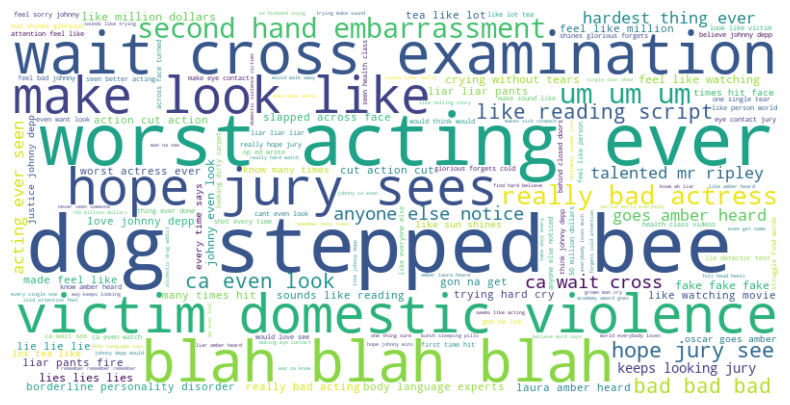

In [ ]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')  # Download the Punkt tokenizer

# Load your sentiment data into a DataFrame
df = pd.read_csv('sentiment_analysis_results.csv')

# Create an empty counter for trigram frequencies
trigram_counter = Counter()

# Define a function to update trigram frequencies
def update_trigram_frequencies(comment):
    words = word_tokenize(comment.lower())
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    trigrams_list = list(ngrams(words, 3, pad_left=True, pad_right=True))

    for trigram in trigrams_list:
        # Filter out padding and empty trigrams
        if all(word is not None and len(word) > 0 for word in trigram):
            trigram_str = ' '.join(trigram)
            trigram_counter[trigram_str] += 1

# Iterate through the DataFrame and update the trigram frequencies
for comment in df['Comments']:
    update_trigram_frequencies(comment)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(trigram_counter)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anukul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


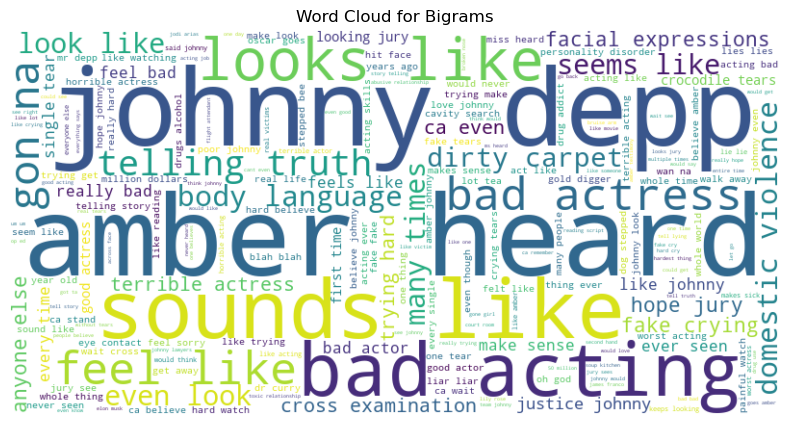

In [ ]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import bigrams
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')  # Download the Punkt tokenizer

# Load your sentiment data into a DataFrame
df = pd.read_csv('sentiment_analysis_results.csv')

# Create an empty counter for bigram frequencies
bigram_counter = Counter()

# Define a function to update bigram frequencies
def update_bigram_freqBuencies(comment):
    words = word_tokenize(comment.lower())
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    bigrams_list = list(bigrams(words))

    for bigram in bigrams_list:
        bigram_str = ' '.join(bigram)
        bigram_counter[bigram_str] += 1

# Iterate through the DataFrame and update the bigram frequencies
for comment in df['Comments']:
    update_bigram_frequencies(comment)

# Create a WordCloud object for bigrams
wordcloud_bigrams = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(bigram_counter)

# Display the word cloud for bigrams using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bigrams, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Bigrams")
plt.show()


In [ ]:
import pandas as pd
from bertopic import BERTopic

# Read the CSV file
df = pd.read_csv('Youtube_comments_combined.csv')

# Select only 6000 rows
df = df.iloc[:6000]

# Initialize the BERTopic model
model = BERTopic(verbose=True)

# Extract the text data from the specified column
docs = df['Comments'].to_list()

# Fit the model on the text data
topics, probabilities = model.fit_transform(docs)

# Get the topic frequencies and visualize a bar chart
model.get_topic_freq().head(10)
model.visualize_barchart()

Batches: 100%|██████████| 188/188 [1:42:35<00:00, 32.74s/it]  
2023-10-11 23:36:07,574 - BERTopic - Transformed documents to Embeddings
2023-10-11 23:37:37,504 - BERTopic - Reduced dimensionality
2023-10-11 23:37:38,124 - BERTopic - Clustered reduced embeddings


In [ ]:
# model.get_topic_freq().head(8)
# model.visualize_barchart()
model.visualize_hierarchy()

### Sentiment score on Final Statement

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Compound score represents overall sentiment

# Analyze the sentiment of the provided text
text = """
Dear Everyone,
Recent events have garnered public attention and commentary, prompting me to share my thoughts on the matter. I believe in openness and understanding, and thus, I wish to express my perspective.
In any relationship, complexities can arise, and different perspectives can exist. It's vital to acknowledge the value of introspection and personal growth in such situations. My intention is not to assign blame or engage in resentment but to reflect on the lessons learned and to evolve from them.
While the legal processes in various jurisdictions have been challenging, and despite my disappointment with aspects of the American judicial system, I have chosen to prioritize my own healing and growth over continuing a legal battle. I believe it's time to step away from the public eye and focus on a path of self-growth.
I appreciate your understanding and respect for my need for privacy during this time.
Thank you for your understanding.
Sincerely,
Amber Heard
"""

sentiment_score = get_sentiment_score(text)
print("Sentiment Score:", sentiment_score)


Sentiment Score: 0.9831
